# Kinematics

This notebook provides an interactive environment where to play with the inverse and direct kinematics of the robot.

## Arm parameters

In [46]:
# Define link lengths in mm
L1 = 94  # Link 2 length
L2 = 80  # Link 2 length

## Inverse kinematics

In [47]:
import numpy as np

def inverse_kinematics(x, y):
    """
    Compute the inverse kinematics of the links 2 and 3 of the SCARA arm.
    The first link is prismatic and the inverse kinematics reduces to q1=z.

    Args:
        x (float): The x coordinate of the point we want to reach.
        y (float): The y coordinate of the point we want to reach. 
    """
    
    distance = np.sqrt(x**2 + y**2)
    
    # Check if the point is reachable
    if distance > (L1 + L2):
        return None  # Point is out of reach

    # Compute c3 (cosine of the third angle)
    c3 = (x**2 + y**2 - L1**2 - L2**2) / (2 * L1 * L2)
    s3_p = np.sqrt(1 - c3**2)
    
    # Compute q3 (third angle)
    q3_p = np.arctan2(s3_p, c3)
    
    # Compute q2 (second angle)
    A = L2 * c3 + L1
    B_p = L2 * s3_p
    q2_p = np.arctan2(y, x) - np.arctan2(B_p, A)

    return q2_p, q3_p


In [48]:
x_target = 120
y_target = 200

result = inverse_kinematics(x_target, y_target)
if result is not None:
    q2, q3 = result
    print(f'q2: {np.rad2deg(q2)}\nq3: {np.rad2deg(q3)}')
else:
    print(f'Point {x_target}, {y_target} is unreachable.')

Point 120, 200 is unreachable.


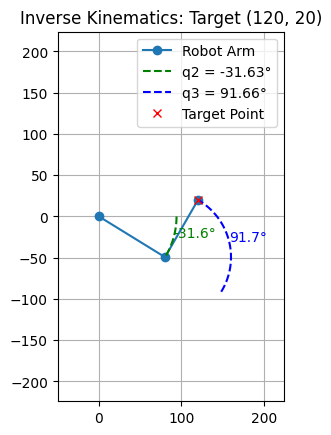

In [49]:
import matplotlib.pyplot as plt

def plot_robot_with_angles(x, y):
    """
    Visualize the robot's links and the angles computed by the inverse kinematics function.

    Args:
        x (float): The x coordinate of the point we want to reach.
        y (float): The y coordinate of the point we want to reach.  
    """

    # Plotting the robot arm
    plt.figure()

    result = inverse_kinematics(x, y)    
    if result is not None:
        q2, q3 = result
    else:
        q2, q3 = 0, 0

    # Joint positions
    joint1_x, joint1_y = L1 * np.cos(q2), L1 * np.sin(q2)
    joint2_x = joint1_x + L2 * np.cos(q2 + q3)
    joint2_y = joint1_y + L2 * np.sin(q2 + q3)
    plt.plot([0, joint1_x, joint2_x], [0, joint1_y, joint2_y], '-o', label="Robot Arm")
    
    if result is not None:

        # Drawing angle arcs and adding annotations
        arc = np.linspace(0, q2, 100)
        plt.plot(L1 * np.cos(arc), L1 * np.sin(arc), 'g--', label=f'q2 = {np.degrees(q2):.2f}°')
        plt.text(L1 * np.cos(q2/2), L1 * np.sin(q2/2), f'{np.degrees(q2):.1f}°', color='g')

        arc = np.linspace(q2, q2 + q3, 100)
        plt.plot(joint1_x + L2 * np.cos(arc), joint1_y + L2 * np.sin(arc), 'b--', label=f'q3 = {np.degrees(q3):.2f}°')
        plt.text(joint1_x + L2 * np.cos(q2 + q3/2), joint1_y + L2 * np.sin(q2 + q3/2), f'{np.degrees(q3):.1f}°', color='b')

    # Draw the target point        
    plt.plot(x, y, 'rx', label="Target Point")
    
    # Set axis limits
    major_tile_size = 50

    x_min = - major_tile_size
    x_max = L1 + L2 + major_tile_size
    y_min = -L1 - L2 - major_tile_size
    y_max = L1 + L2 + major_tile_size
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Set aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().grid(True)

    plt.title(f"Inverse Kinematics: Target ({x}, {y})")
    plt.legend()
    plt.show()

# Example

x_target = 120
y_target = 20
plot_robot_with_angles(x_target, y_target)

## Direct kinematics

In [50]:
def forward_kinematics(q2, q3):
    """
    Direct kinematics function. Provided two joint angles, returns the 
    coordinates of the end effector.

    Args:
        q2 (float): Second joint angle.
        q3 (float): Third joint angle.
    """

    # Joint positions
    joint1_x = L1 * np.cos(q2)
    joint1_y = L1 * np.sin(q2)

    joint2_x = joint1_x + L2 * np.cos(q2 + q3)
    joint2_y = joint1_y + L2 * np.sin(q2 + q3)

    return joint1_x, joint1_y, joint2_x, joint2_y

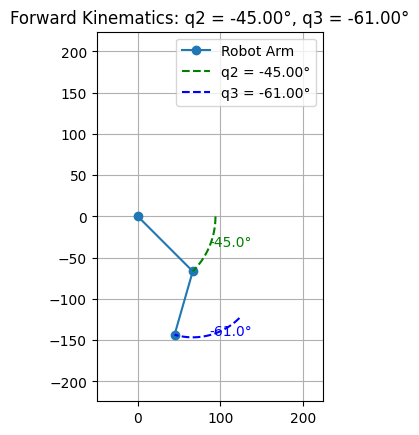

In [51]:
def plot_forward_kinematics(q2, q3):
    """
    Visualize the robot's links and the angles provided as argument.

    Args:
        q2 (float): Second joint angle.
        q3 (float): Third joint angle.
    """

    # Compute joint positions from forward kinematics
    joint1_x, joint1_y, joint2_x, joint2_y = forward_kinematics(q2, q3)

    # Plot the robot arm
    plt.figure()
    plt.plot([0, joint1_x, joint2_x], [0, joint1_y, joint2_y], '-o', label="Robot Arm")

    # Drawing angle arcs and adding annotations
    arc = np.linspace(0, q2, 100)
    plt.plot(L1 * np.cos(arc), L1 * np.sin(arc), 'g--', label=f'q2 = {np.degrees(q2):.2f}°')
    plt.text(L1 * np.cos(q2/2), L1 * np.sin(q2/2), f'{np.degrees(q2):.1f}°', color='g')

    arc = np.linspace(q2, q2 + q3, 100)
    plt.plot(joint1_x + L2 * np.cos(arc), joint1_y + L2 * np.sin(arc), 'b--', label=f'q3 = {np.degrees(q3):.2f}°')
    plt.text(joint1_x + L2 * np.cos(q2 + q3/2), joint1_y + L2 * np.sin(q2 + q3/2), f'{np.degrees(q3):.1f}°', color='b')

    # Set axis limits
    major_tile_size = 50
    x_min = - major_tile_size
    x_max = L1 + L2 + major_tile_size
    y_min = -L1 - L2 - major_tile_size
    y_max = L1 + L2 + major_tile_size
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Set aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().grid(True)

    plt.title(f"Forward Kinematics: q2 = {np.degrees(q2):.2f}°, q3 = {np.degrees(q3):.2f}°")
    plt.legend()
    plt.show()

# Example

q2 = -45
q3 = -61
q2_rad = np.radians(q2)
q3_rad = np.radians(q3)
plot_forward_kinematics(q2_rad, q3_rad)

## Interpolating a line

In [52]:
def plot_interpolation(points):
    """
    Visualize the robot's behavior when interpolating a line.

    Args:
        points (linst[float]): The coordinates of the points we want to reach.
    """

    # Plotting the robot arm
    plt.figure()

    if len(points) < 2:
        raise ValueError("Invalid point sequence. We should have at least 2 points.")

    def plot_configuration(x, y, label=""):

        result = inverse_kinematics(x, y)    
        if result is not None:
            q2, q3 = result

            # Joint positions
            joint1_x, joint1_y = L1 * np.cos(q2), L1 * np.sin(q2)
            joint2_x = joint1_x + L2 * np.cos(q2 + q3)
            joint2_y = joint1_y + L2 * np.sin(q2 + q3)
            plt.plot([0, joint1_x, joint2_x], [0, joint1_y, joint2_y], '-o', label=label)

    for x, y in points[1:-1]:
        plot_configuration(x, y)

    plot_configuration(points[0][0], points[0][1], label='Initial position')
    plot_configuration(points[-1][0], points[-1][1], label='Final position')
        
    # Set axis limits
    major_tile_size = 50

    x_min = - major_tile_size
    x_max = L1 + L2 + major_tile_size
    y_min = -L1 - L2 - major_tile_size
    y_max = L1 + L2 + major_tile_size
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Set aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().grid(True)

    plt.title(f"Line interpolation")
    plt.legend()
    plt.show()


In [53]:
def interpolate_line(initial_point, final_point, num_points):
    """
    Interpolates a line between the input initial and final point.

    Args:
        initial_point (tuple): Initial point (x0, y0).
        final_point (tuple): Final point (x1, y1).
        num_points (int): The number of points to generate.

    Returns:
        points (List[tuple]): A list of (x, y) coordinates interpolating the line.
    """
    x0, y0 = initial_point
    x1, y1 = final_point

    points = []
    for i in range(num_points):
        t = i / (num_points - 1)  # Normalized parameter between 0 and 1
        x = x0 + t * (x1 - x0)
        y = y0 + t * (y1 - y0)
        points.append((x, y))

    return points

initial_point = (100, -140)
final_point = (100, 140)
points = interpolate_line(initial_point, final_point, 10)

for point in points:
    z = point[2] if len(point) > 2 else 0.1
    print(f"Point({point[0]:.2f}, {point[1]:.2f}, {z})")

Point(100.00, -140.00, 0.1)
Point(100.00, -108.89, 0.1)
Point(100.00, -77.78, 0.1)
Point(100.00, -46.67, 0.1)
Point(100.00, -15.56, 0.1)
Point(100.00, 15.56, 0.1)
Point(100.00, 46.67, 0.1)
Point(100.00, 77.78, 0.1)
Point(100.00, 108.89, 0.1)
Point(100.00, 140.00, 0.1)


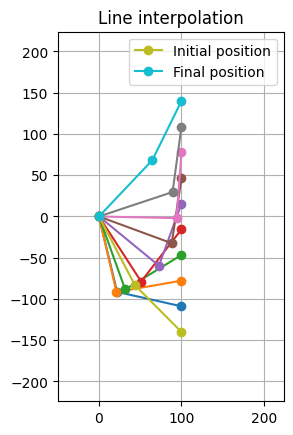

In [54]:
plot_interpolation(points)